In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame

# library to detect gender with a name
import gender_guesser.detector as gender

# regex
import re

#For plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
sns.set()

In [6]:
from datetime import datetime,timedelta
import glob

def combine_data_files(path):
    """
    Takes in all the datafiles and combines them into dataframes based
    """
    filenames = glob.glob(path+"*bookings*.csv")
    print(filenames)

    df_list = []
    
    for file in filenames:
        df = pd.read_csv(file,usecols=range(1,11))
        print(df.columns)
        df_list.append(df)
        

    return pd.concat(df_list).drop_duplicates()
        
bookings = combine_data_files(r'Data/')
# bookings.to_csv("Data/OverallData_1102_0603.csv")
        


['Data\\LKCSB_bookings_1102.csv', 'Data\\LKCSB_bookings_1202_2502.csv', 'Data\\LKCSB_bookings_2502_0603.csv', 'Data\\SIS_bookings_1102.csv', 'Data\\SIS_bookings_1202_2502.csv', 'Data\\SIS_bookings_2502_0603.csv', 'Data\\SOA_bookings_1102.csv', 'Data\\SOA_bookings_1202_2502.csv', 'Data\\SOA_bookings_2502_0603.csv', 'Data\\SOE_bookings_1102.csv', 'Data\\SOE_bookings_1202_2502.csv', 'Data\\SOE_bookings_2502_0603.csv', 'Data\\SOL_bookings_1102.csv', 'Data\\SOL_bookings_1202_2502.csv', 'Data\\SOL_bookings_2502_0603.csv']
Index(['Day', 'Facility', 'Booking Time', 'Booking Status',
       'Booking Reference Number', 'Booked for User Name',
       'Booked for User Org Unit', 'Booked for User Email Address', 'Use Type',
       'Purpose of Booking'],
      dtype='object')
Index(['Day', 'Facility', 'Booking Time', 'Booking Status',
       'Booking Reference Number', 'Booked for User Name',
       'Booked for User Org Unit', 'Booked for User Email Address', 'Use Type',
       'Purpose of Booking']

In [7]:
# bookings_SIS = pd.read_csv('Data\SIS_bookings_1102.csv')
# bookings_SOB = pd.read_csv('Data\LKCSB_bookings_1102.csv')
# bookings_SOA = pd.read_csv('Data\SOA_bookings_1102.csv')
# bookings_SOE = pd.read_csv('Data\SOE_bookings_1102.csv')
# bookings_SOL = pd.read_csv('Data\SOL_bookings_1102.csv')
# bookings = pd.concat([bookings_SIS,bookings_SOB,bookings_SOA,bookings_SOE,bookings_SOL])

In [8]:
bookings

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,"11 February 2020, Tuesday",LKCSB GSR 1-1,12:00-15:30,Confirmed,BK-20200129-001141,TAN SWEE KOK,Student,sktan.2018@business.smu.edu.sg,AdHoc,Sleep
1,"11 February 2020, Tuesday",LKCSB GSR 1-1,15:30-19:00,Confirmed,BK-20200205-000828,CHIA HUI SHAN VIKKI,Student,vikki.chia.2019@business.smu.edu.sg,Academic,project
2,"11 February 2020, Tuesday",LKCSB GSR 1-2,11:30-15:30,Confirmed,BK-20200204-000146,TAN SI YUN SABRINA,Student,sabrina.tan.2016@business.smu.edu.sg,AdHoc,Meeting
3,"11 February 2020, Tuesday",LKCSB GSR 1-2,15:30-19:00,Confirmed,BK-20200209-000202,JERROLD TAN SHAO LUN,Student,jerrold.tan.2019@socsc.smu.edu.sg,AdHoc,study
4,"11 February 2020, Tuesday",LKCSB GSR 2-1,11:30-15:30,Confirmed,BK-20200128-000549,TSAI PEI YING,Student,pytsai.2018@socsc.smu.edu.sg,AdHoc,study
...,...,...,...,...,...,...,...,...,...,...
514,"26 February 2020, Wednesday",SOL-B1.11-GS,16:30-18:30,Confirmed,BK-20200226-000425,EMMA ASHLEY NG,Student,emmang.2019@law.smu.edu.sg,AdHoc,meeting
515,"26 February 2020, Wednesday",SOL-B1.11-GS,18:30-21:00,Confirmed,BK-20200223-000006,CHUA SHU NING,Student,snchua.2018@accountancy.smu.edu.sg,AdHoc,study
516,"26 February 2020, Wednesday",SOL-B1.12-GS,08:30-11:30,Confirmed,BK-20200225-001124,TAN KOK WAH JOHNATHAN,Student,kwtan.2017@sis.smu.edu.sg,AdHoc,study
517,"26 February 2020, Wednesday",SOL-B1.12-GS,11:30-15:30,Confirmed,BK-20200206-001170,Kayaking Team,Student,kayaking@sa.smu.edu.sg,Co-Curricular,Meeting


In [9]:
bookings.count()

Day                              15204
Facility                         15204
Booking Time                     15204
Booking Status                   15204
Booking Reference Number         15204
Booked for User Name             15204
Booked for User Org Unit         15204
Booked for User Email Address    15204
Use Type                         15204
Purpose of Booking               15204
dtype: int64

In [10]:
# bookings = bookings.drop(columns='Unnamed: 0')
# bookings = bookings.drop(bookings.index[0])
# bookings = bookings.rename(columns={'0' : 'Day', '1': 'Facility', '2':'Booking Time', '3': 'Purpose'})

KeyError: "['Unnamed: 0'] not found in axis"

In [12]:
bookings['Facility'].unique()

array(['LKCSB GSR 1-1', 'LKCSB GSR 1-2', 'LKCSB GSR 2-1',
       'LKCSB GSR 2-10', 'LKCSB GSR 2-11', 'LKCSB GSR 2-12',
       'LKCSB GSR 2-13', 'LKCSB GSR 2-14', 'LKCSB GSR 2-15',
       'LKCSB GSR 2-16', 'LKCSB GSR 2-17', 'LKCSB GSR 2-18',
       'LKCSB GSR 2-19', 'LKCSB GSR 2-2', 'LKCSB GSR 2-20',
       'LKCSB GSR 2-21', 'LKCSB GSR 2-22', 'LKCSB GSR 2-23',
       'LKCSB GSR 2-24', 'LKCSB GSR 2-25', 'LKCSB GSR 2-3',
       'LKCSB GSR 2-4', 'LKCSB GSR 2-5', 'LKCSB GSR 2-6', 'LKCSB GSR 2-7',
       'LKCSB GSR 2-8', 'LKCSB GSR 2-9', 'LKCSB GSR 3-1',
       'LKCSB GSR 3-11', 'LKCSB GSR 3-12', 'LKCSB GSR 3-13',
       'LKCSB GSR 3-14', 'LKCSB GSR 3-15', 'LKCSB GSR 3-16',
       'LKCSB GSR 3-17', 'LKCSB GSR 3-18', 'LKCSB GSR 3-19',
       'LKCSB GSR 3-2', 'LKCSB GSR 3-20', 'LKCSB GSR 3-21',
       'LKCSB GSR 3-22', 'LKCSB GSR 3-23', 'LKCSB GSR 3-24',
       'LKCSB GSR 3-25', 'LKCSB GSR 3-26', 'LKCSB GSR 3-27',
       'LKCSB GSR 3-28', 'LKCSB GSR 3-29', 'LKCSB GSR 3-3',
       'LKCSB GSR 3-

In [13]:
bookings['Booking Time'].unique()

array(['12:00-15:30', '15:30-19:00', '11:30-15:30', '15:30-19:30',
       '19:30-22:00', '09:00-12:00', '12:00-14:00', '14:00-18:00',
       '19:00-22:30', '09:30-12:30', '13:30-17:30', '18:00-21:30',
       '10:00-11:30', '11:30-13:30', '13:30-15:00', '15:00-16:30',
       '17:00-19:00', '09:00-13:00', '13:00-15:00', '15:00-18:30',
       '09:30-11:00', '11:00-15:00', '15:00-16:00', '16:00-20:00',
       '13:00-17:00', '19:00-22:00', '10:30-14:00', '18:00-22:00',
       '09:00-12:30', '12:30-15:00', '15:00-17:30', '19:30-21:00',
       '21:00-22:00', '10:00-14:00', '11:00-12:00', '15:30-18:30',
       '18:30-21:30', '08:30-12:00', '12:00-15:00', '10:00-12:00',
       '15:00-19:00', '19:00-21:00', '16:00-18:30', '12:00-16:00',
       '09:30-12:00', '11:30-14:30', '14:30-16:00', '12:00-13:30',
       '13:30-15:30', '15:30-17:30', '17:30-19:30', '14:30-18:30',
       '18:30-21:00', '15:30-16:30', '16:30-20:30', '16:00-19:00',
       '17:00-21:00', '21:00-22:30', '20:00-22:30', '10:00-13:

In [14]:
def get_half_hr_iterations(time_range):
    """
    Given string of booking time-range eg '1030-1200', return the number of 30minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_start_and_end_timings -> list of start and end timings
    
    time_object_1 & time_object_2 -> converts the start and end timings to datetime.time objects
    whether the day is a weekday or not. 8am to 1030pm
    
    start_booking_time_mins & end_booking_time_mins -> Convert the booking timings into minutes for calculation
    of the number of 30 minutes interval. e.g. 240 minutes -> 4 hours -> 8 thirty minute intervals

    """
    hold_start_and_end_timings = time_range.split('-')
    time_object_1 = datetime.strptime(hold_start_and_end_timings[0],'%H:%M').time()
    time_object_2 = datetime.strptime(hold_start_and_end_timings[1],'%H:%M').time()
    h1, m1, s1 = time_object_1.hour, time_object_1.minute, time_object_1.second
    h2, m2, s2 = time_object_2.hour, time_object_2.minute, time_object_2.second
    
    start_booking_time_mins = (m1 + 60*h1) 
    end_booking_time_mins = (m2 + 60*h2)
    
    return int((end_booking_time_mins - start_booking_time_mins)/60/0.5)


print(get_half_hr_iterations('08:30-12:30'))

# bookings['Booking Time'].apply(get_half_hr_iterations())

8


In [15]:
def expand_df_based_on_intervals(bookings):
    """
    Given a dataframe containing bookings in time-ranges e.g. 08:30-09:30, 
    returns a new dataframe after expanding the timing into 
    30 minutes interval -> 08:30, 09:00, 09:30. 
    This is done for every row of facility booking.
    
    new_bookings -> new pandas DataFrame to hold the expanded time-ranges based on 30 minutes interval. 
    To be returned at the end.
    
    num_iter -> Given string of booking time-range eg '1030-1200', return the number of 30 minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_time -> String which holds the starttime after splitting the time-range by '-'. e.g. '08:30-10:30 -> 08:30'
    """

    new_bookings = pd.DataFrame(columns=['Day','Facility','Booking Time','Booking Status', 'Booking Reference Number', 
                                         'Booked for User Name', 'Booked for User Org Unit', 'Booked for User Email Address',
                                        'Use Type', 'Purpose of Booking']) #new df to hold the intervals

    for index,columns in bookings.iterrows():
        num_iter = get_half_hr_iterations(columns['Booking Time']) #generates 30 minutes interval
        hold_time = columns['Booking Time'].split('-')
        hold_time = hold_time[0]

        for i in range(num_iter):
            #add a new row of record into the new df
            new_bookings.loc[len(new_bookings)] = [columns['Day'], columns['Facility'], hold_time, columns['Booking Status'],
                                                  columns['Booking Reference Number'],columns['Booked for User Name'],
                                                   columns['Booked for User Org Unit'],columns['Booked for User Email Address'],
                                                  columns['Use Type'],columns['Purpose of Booking']] 
            
            #add 30 minutes to the previous timing added into the new df
            hold_time = datetime.strptime(hold_time,'%H:%M')+ timedelta(minutes=30) 
            
            #the hold_time variable is now a datetime object because timedelta cannot be used on datetime.time() objects
            #so, we convert it back to timings as we do not need the date
            hold_time = hold_time.strftime("%H:%M")
            
    return new_bookings

expanded_bookings = expand_df_based_on_intervals(bookings)

In [16]:
expanded_bookings.head()


,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,"11 February 2020, Tuesday",LKCSB GSR 1-1,12:00,Confirmed,BK-20200129-001141,TAN SWEE KOK,Student,sktan.2018@business.smu.edu.sg,AdHoc,Sleep
1,"11 February 2020, Tuesday",LKCSB GSR 1-1,12:30,Confirmed,BK-20200129-001141,TAN SWEE KOK,Student,sktan.2018@business.smu.edu.sg,AdHoc,Sleep
2,"11 February 2020, Tuesday",LKCSB GSR 1-1,13:00,Confirmed,BK-20200129-001141,TAN SWEE KOK,Student,sktan.2018@business.smu.edu.sg,AdHoc,Sleep
3,"11 February 2020, Tuesday",LKCSB GSR 1-1,13:30,Confirmed,BK-20200129-001141,TAN SWEE KOK,Student,sktan.2018@business.smu.edu.sg,AdHoc,Sleep
4,"11 February 2020, Tuesday",LKCSB GSR 1-1,14:00,Confirmed,BK-20200129-001141,TAN SWEE KOK,Student,sktan.2018@business.smu.edu.sg,AdHoc,Sleep


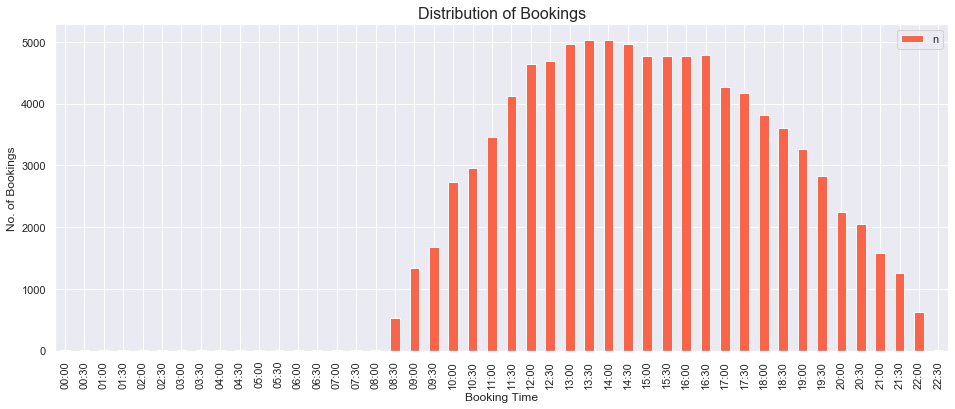

In [17]:
bookings_time = expanded_bookings.groupby('Booking Time').size().reset_index(name='n')

fig, ax = plt.subplots()
bookings_time.plot(kind='bar', x='Booking Time', y='n', ax=ax, figsize=(16, 6), color='tomato',)
ax.set_ylabel("No. of Bookings")
ax.set_xlabel("Booking Time")
plt.title("Distribution of Bookings", fontsize=16)
plt.show()

In [18]:
#plot timings based on how many rows for each timing

#relationship between the school booker is from vs the school which booker booked in

#forecasting(?????)

#do analysis with SR vs without SR to see differences/trends


#pd.grouper() to groupby weeks, frequency = w

In [19]:
#to determine the popular booking timing
popular_bookings_time = expanded_bookings.groupby('Booking Time').size()
popular_bookings_time

Booking Time
00:00       1
00:30       1
01:00       1
01:30       1
02:00       1
02:30       1
03:00       1
03:30       1
04:00       1
04:30       1
05:00       1
05:30       1
06:00       1
06:30       1
07:00       1
07:30       1
08:00       7
08:30     533
09:00    1344
09:30    1682
10:00    2724
10:30    2953
11:00    3453
11:30    4120
12:00    4637
12:30    4691
13:00    4970
13:30    5031
14:00    5029
14:30    4966
15:00    4769
15:30    4774
16:00    4768
16:30    4786
17:00    4262
17:30    4171
18:00    3807
18:30    3601
19:00    3257
19:30    2821
20:00    2249
20:30    2056
21:00    1581
21:30    1254
22:00     621
22:30       3
dtype: int64

In [20]:
#popular facilities/GSR from the schools
def popular_facilities_each_school(booking_df):
    """
    Given a dataframe containing bookings, 
    returns a new dataframe of facilities by school,
    sorted from most popular to least popular.
    
    sch_dict -> nested dictionary to hold the count of booking for
    each facility in each school e.g. {LKCSB: {LKCSB GSR 1-1:200}}
    
    
    booking_groupby_facility -> stores a groupby of the input dataframe, according to facilities)
    
    """
    sch_dict = {'LKCSB':{},'SIS':{},'SOA':{},'SOL':{},'SOE':{}}
    booking_groupby_facility = booking_df.groupby('Facility').size().reset_index(name='Count')
        
    for index,columns in booking_groupby_facility.iterrows():
        if 'LKCSB' in columns['Facility']:
            sch_dict['LKCSB'][columns['Facility']] = columns['Count']
            
        elif 'SIS' in columns['Facility']:
            sch_dict['SIS'][columns['Facility']] = columns['Count']
            
        elif 'SOA' in columns['Facility']:
            sch_dict['SOA'][columns['Facility']] = columns['Count']
            
        elif 'SOL' in columns['Facility']:
            sch_dict['SOL'][columns['Facility']] = columns['Count']
            
        elif 'SOE' in columns['Facility']:
            sch_dict['SOE'][columns['Facility']] = columns['Count']

    return pd.DataFrame(sch_dict)['SOE'].dropna().sort_values(ascending=False)

popular_facilities_each_school(expanded_bookings) #testing the function
#use case of this function: 
#combine  with availability of facility function to determine the best rooms to book that are available

SOE/SOSS GSR 3-16    711.0
SOE/SOSS GSR 4-9     699.0
SOE/SOSS GSR 3-13    697.0
SOE/SOSS GSR 4-6     690.0
SOE/SOSS GSR 3-18    687.0
SOE/SOSS GSR 3-2     686.0
SOE/SOSS GSR 4-10    682.0
SOE/SOSS GSR 3-6     677.0
SOE/SOSS GSR 3-14    670.0
SOE/SOSS GSR 2-11    665.0
SOE/SOSS GSR 2-10    662.0
SOE/SOSS GSR 2-7     656.0
SOE/SOSS GSR 3-10    653.0
SOE/SOSS GSR 2-12    650.0
SOE/SOSS GSR 2-2     650.0
SOE/SOSS GSR 3-1     649.0
SOE/SOSS GSR 3-8     646.0
SOE/SOSS GSR 3-11    645.0
SOE/SOSS GSR 3-12    640.0
SOE/SOSS GSR 2-6     638.0
SOE/SOSS GSR 2-15    636.0
SOE/SOSS GSR 2-13    635.0
SOE/SOSS GSR 3-9     627.0
SOE/SOSS GSR 2-3     626.0
SOE/SOSS GSR 2-4     621.0
SOE/SOSS GSR 3-4     620.0
SOE/SOSS GSR 2-14    620.0
SOE/SOSS GSR 4-7     618.0
SOE/SOSS GSR 3-15    613.0
SOE/SOSS GSR 3-3     613.0
SOE/SOSS GSR 2-5     611.0
SOE/SOSS GSR 3-17    611.0
SOE/SOSS GSR 2-1     610.0
SOE/SOSS GSR 2-8     607.0
SOE/SOSS GSR 2-17    603.0
SOE/SOSS GSR 3-5     593.0
SOE/SOSS GSR 2-16    592.0
S

In [21]:
# clustering model (unsupervised) --> based on frequency and duration of their booking. 
#Can analyse clusters to find out what sch they are from and rough timings they booked

"""
recreate a new df of only 2 columns.

frequency -> count the no. of times they booked (need to use original df)
duration of their booking --> use expanded

iterate through SSE and see if the drop in SSE is significant or not. Can use this to gauge the optimal k


"""
# number_of_bookings_per_user is a dictionary to store number of bookings per user:
number_of_bookings_per_user = {}
name = []
num_bookings = []

#name_email_dict is a dictionary derived from the original bookings dataframe.
name_email_dict = pd.Series(bookings['Booked for User Email Address'].values,index=bookings['Booked for User Name']).to_dict()

def add_user_details(name_of_user):
    """ 
    Input: A global dictionary where key is the user's full name and value is the user's smu email address
    
    Output: The user's school. E.g. BUSINESS,SIS,ECONOMICS
    """
    
    global name_email_dict
    email_add = name_email_dict[name_of_user].split('@')
    return email_add[1].split('.')[0].upper()

#add a school column onto the bookings df and filter out users from other schools such as JD/MBA/MITB
bookings['School'] = bookings['Booked for User Name'].apply(add_user_details)
bookings = bookings[bookings['School'].isin(['ACCOUNTANCY','BUSINESS','ECONOMICS','LAW','SIS','SOCSC'])]

for row in bookings['Booked for User Name']:
    if row not in number_of_bookings_per_user:
        number_of_bookings_per_user[row] = [1]
    else:
        number_of_bookings_per_user[row][0]+=1
        
for key in number_of_bookings_per_user:
    name.append(key)
    num_bookings.append(number_of_bookings_per_user[key][0])

number_bookings_df = pd.DataFrame({'Name':name, 'No. of Bookings':num_bookings})
number_bookings_df

#new is a dictionary which stores the total duration a user has booked, in minutes
new = {}
name=[]
duration_of_bookings = []
for row in expanded_bookings['Booked for User Name']:
    if row not in new:
        new[row] = [30]
    else:
        new[row][0]+=30

for key in new:
    name.append(key)
    duration_of_bookings.append(new[key][0])


duration_bookings_df = pd.DataFrame({'Name':name,'Duration of Bookings':duration_of_bookings})
duration_bookings_df


#merge the 2 dataframe
df_merge_col = pd.merge(number_bookings_df, duration_bookings_df, on='Name')
df_merge_col


,Name,No. of Bookings,Duration of Bookings
0,TAN SWEE KOK,8,1590
1,CHIA HUI SHAN VIKKI,1,210
2,TAN SI YUN SABRINA,7,1590
3,JERROLD TAN SHAO LUN,2,420
4,TSAI PEI YING,10,2340
...,...,...,...
4051,CHARIS PEH,1,120
4052,NEO WEI TING,1,150
4053,JUSTIN TAN,1,240
4054,KLYSSA JAMIE CHONG SHAN SHAN,1,240


In [22]:
#plot the SSEs and determine optimal k
df_merge_col_name_dropped = df_merge_col.drop(['Name'],axis=1)

def add_one(col):
    return col+1
df_merge_col_name_dropped_add_one = np.log(df_merge_col_name_dropped['No. of Bookings'].apply(add_one)).reset_index()
df_merge_col_name_dropped_add_one['Duration of Bookings'] = df_merge_col_name_dropped['Duration of Bookings'].apply(np.log)

# sns.boxplot(df_merge_col_name_dropped_add_one)
# sns.boxplot(np.log(df_merge_col_name_dropped['Duration of Bookings']))

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
df_merge_col_name_dropped_add_one.drop(columns = 'index',inplace=True)

In [25]:
df_merge_col_name_dropped_add_one.head()

,No. of Bookings,Duration of Bookings
0,2.197225,7.371489
1,0.693147,5.347108
2,2.079442,7.371489
3,1.098612,6.040255
4,2.397895,7.757906


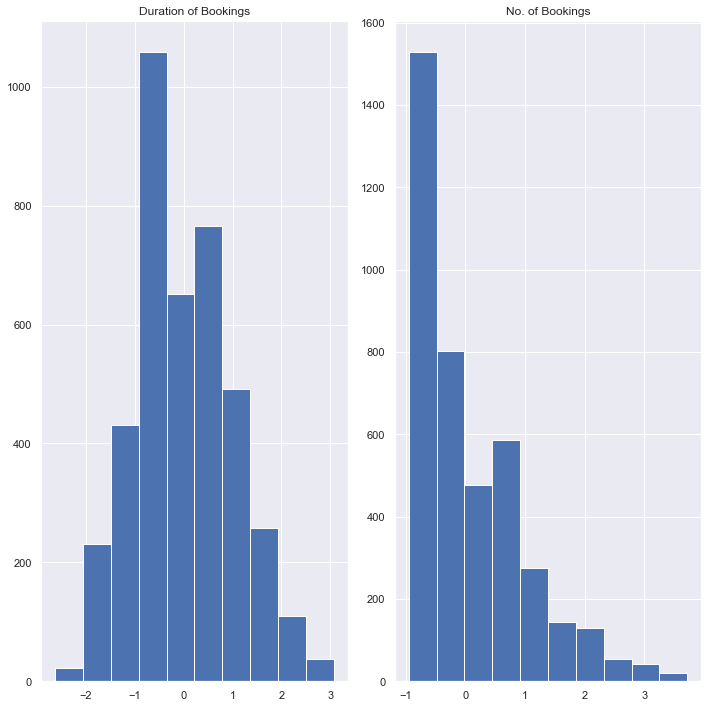

In [26]:
# Solution
scaler = StandardScaler()
scaler.fit(df_merge_col_name_dropped_add_one) 
df_merge_col_name_dropped_scaled = scaler.transform(df_merge_col_name_dropped_add_one)

df_merged_prepared = pd.DataFrame(df_merge_col_name_dropped_scaled, columns=df_merge_col_name_dropped_add_one.columns)

df_merged_prepared

df_merged_prepared.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [27]:
#determine SSE

SSE = []

for i in range(1,8):
    model5 = KMeans(n_clusters = i)
    model5.fit(df_merged_prepared)
    SSE.append(model5.inertia_)
print(SSE)



[8112.000000000001, 2632.5275664946294, 1343.4092025664818, 851.0528723185115, 635.8773870760708, 438.09482332712366, 348.37077172037357]


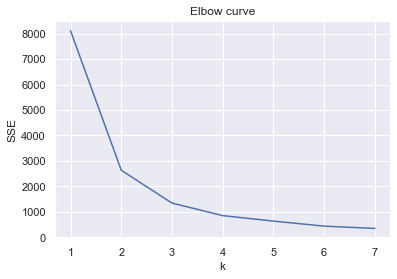

In [28]:
# Plot the elbow curve


k = (range(1,8))
plt.plot(k, SSE)

plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [29]:
#perform clustering with k = 5
model = KMeans(n_clusters = 3,random_state=99)
model.fit(df_merged_prepared)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [30]:
# print the attributes inertia_, n_iter, cluster_centers_ of the obtianed model

print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

Attributes of the clustering solution for k=3:
SSE : 1343.4
Num of iterations : 10

Cluster centers : [[ 0.12665525  0.23935495]
 [-0.89494691 -0.94332934]
 [ 1.60944563  1.48580868]]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94936 entries, 0 to 94935
Data columns (total 10 columns):
Day                              94936 non-null object
Facility                         94936 non-null object
Booking Time                     94936 non-null object
Booking Status                   94936 non-null object
Booking Reference Number         94936 non-null object
Booked for User Name             94936 non-null object
Booked for User Org Unit         94936 non-null object
Booked for User Email Address    94936 non-null object
Use Type                         94936 non-null object
Purpose of Booking               94936 non-null object
dtypes: object(10)
memory usage: 8.0+ MB


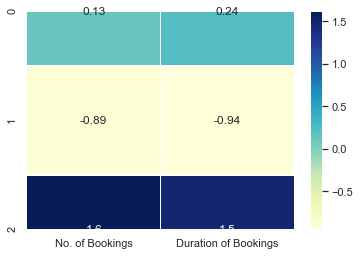

In [36]:
clust_means = pd.DataFrame(model.cluster_centers_, columns=df_merge_col_name_dropped.columns)
sns.heatmap(clust_means,  linewidths=.5, cmap="YlGnBu",annot=True)
#add cluster groups for each user
df_merge_col['Cluster Groups'] = model.labels_


In [32]:
df_merge_col['School'] = df_merge_col['Name'].apply(add_user_details)
df_merge_col.groupby('Cluster Groups')['School'].value_counts()

Cluster Groups  School     
0               BUSINESS       630
                SIS            293
                ACCOUNTANCY    220
                ECONOMICS      184
                SOCSC          168
                LAW             97
1               BUSINESS       660
                SIS            280
                ACCOUNTANCY    215
                SOCSC          196
                ECONOMICS      187
                LAW            126
2               BUSINESS       283
                SIS            145
                ACCOUNTANCY    135
                ECONOMICS      110
                SOCSC           73
                LAW             54
Name: School, dtype: int64

In [35]:
df_merge_col.to_csv('bookings_to_visualise.csv',index=False)



## Yan Rui's function
### - Function predicts gender of the booker using their name

In [34]:
# bookings['Gender Predict'] = bookings['Booked for User Name'].apply(lambda x: _get_gender(x))